<a href="https://colab.research.google.com/github/n9quan/QR_Colab/blob/main/WS_2.1_Lorenz_curve_Gini_coefficient_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring income inequality

One way to visualize the income distribution in a population is to draw a Lorenz curve. This curve shows the entire population lined up along the horizontal axis from the poorest to the richest. The height of the curve at any point on the vertical axis indicates the fraction of total income received by the fraction of the population given by that point on the horizontal axis.

We will start by using income decile data from the Global Consumption and Income Project to draw Lorenz curves and compare changes in the income distribution of a country over time. Note that income here refers to market income, which does not take into account taxes or government transfers.

To answer the questions below:

* Go to the [Globalinc website](https://tinyco.re/9553483) and download the Excel file containing the data by clicking ‘xlsx’.
* Save it in an easily accessible location, such as a folder on your Desktop or in your personal folder.
* Import the data into Python as explained below.

## Importing an Excel file into Python

As we are importing an Excel file, we use the `read_excel` function from the `pandas` package. The file is called `GCIPrawdata.xlsx`. Before you import the file into Python, open the datafile in Excel to understand its structure. You will see that the data is all in one worksheet (which is convenient), and that the headings for the variables are in the third row. Hence we will use the `skiprows = 2` option in the `read_excel` function to skip the first two rows.


In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In this worksheet, we will use another way of uploading files that works in all web browsers. To do so, click on the files icon on the left side of your screen. (It is the bottom icon among the four icons on the left.) Next, upload the file you have just downloaded and be sure not to change its name.

In [ ]:
uploaded = files.upload()
decile_data = pd.read_excel("GCIPrawdata.xlsx", skiprows = 2)

Saving GCIPrawdata.xlsx to GCIPrawdata.xlsx


**Exercise:** Print the `decile_data` variable to convince yourself that you have successfully imported the datafile into Python.

In [ ]:
# Solution goes here
decile_data

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412
1,Afghanistan,1981,212,361,469,574,686,818,986,1225,1645,3655,1063,12996923
2,Afghanistan,1982,221,377,490,599,716,854,1029,1278,1717,3814,1109,12667001
3,Afghanistan,1983,238,405,527,644,771,919,1107,1376,1848,4105,1194,12279095
4,Afghanistan,1984,249,424,551,674,806,961,1157,1438,1932,4291,1248,11912510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Zambia,2010,35,88,139,197,267,357,482,680,1070,3860,717,13917439
4795,Zambia,2011,37,90,143,203,275,368,497,701,1104,3983,740,14343526
4796,Zambia,2012,38,94,149,210,285,381,515,726,1143,4123,766,14786581
4797,Zambia,2013,39,97,154,218,295,394,533,751,1183,4268,793,15246086


As you can see, each row shows data for a different country-year combination. The first row is for Afghanistan in 1980, and the first value (in the third column) is 206, for the column `Decile 1 Income`. This value indicates that the mean annual income of the poorest 10% in Afghanistan was the equivalent of 206 USD (in 1980, adjusted using purchasing power parity). Looking at the next column, you can see that the mean income of the next richest 10% (those in the 11th to 20th percentiles for income) was 350.

In addition to the country, year, and the ten income deciles, we have mean income and the population.

## Calculating cumulative shares using the `cumsum` function

To draw Lorenz curves, we need to calculate the cumulative share of total income owned by each decile (these will be the vertical axis values). The cumulative income share of a particular decile is the proportion of total income held by that decile and all the deciles below it. For example, if Decile 1 has 1/10 of total income and Decile 2 has 2/10 of total income, the cumulative income share of Decile 2 is 3/10 (or 0.3).

In the following, we will be using the data for China (a country that recently underwent enormous economic changes) and the United States (a developed country) for 1980 and 2014 as the basis for our Lorenz curves. We will calculate the cumulative income share of each decile. Remember that each decile represents 10% of the population.

**Exercise:** Use the techniques from the previous worksheets to select only the data for the years 1980 and 2014 in China and the United States. Assign the result to a variable called `temp`. (Hint: You may need to take two steps for this.)

In [ ]:
# Solution goes here
time = decile_data[(decile_data["Year"]==1980) | (decile_data["Year"]==2014)]
temp = time[(time["Country"]=="China") | (time["Country"]=="United States")]

As always, you should convince yourself that this operation was successful.

In [ ]:
temp

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
893,China,1980,79,113,146,177,210,245,286,336,404,520,252,981200000
927,China,2014,448,927,1440,2008,2659,3445,4457,5911,8473,18689,4846,1364000000
4554,United States,1980,3392,5820,7855,9724,11574,13549,15843,18839,23622,37949,14817,227200000
4588,United States,2014,3778,6534,9069,11552,14132,16993,20429,25061,32763,60418,20073,318900000


Before we calculate cumulative income shares, we need to calculate the total income for each country-year combination using the mean income and the population size.

In [ ]:
temp["total_income"] = temp["Mean Income"] * temp["Population"]

<ipython-input-6-91ad8dac0134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["total_income"] = temp["Mean Income"] * temp["Population"]


Here, we are creating a new column called `total_income` that, for each row, is calculated by multiplying the respective mean income and population values. You should be able to see the result by printing the data again.

In [ ]:
temp

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population,total_income
893,China,1980,79,113,146,177,210,245,286,336,404,520,252,981200000,247262400000
927,China,2014,448,927,1440,2008,2659,3445,4457,5911,8473,18689,4846,1364000000,6609944000000
4554,United States,1980,3392,5820,7855,9724,11574,13549,15843,18839,23622,37949,14817,227200000,3366422400000
4588,United States,2014,3778,6534,9069,11552,14132,16993,20429,25061,32763,60418,20073,318900000,6401279700000


These numbers are very large, so for our purpose it is easier to assume that there is only one person in each decile, in other words the total income is 10 times the mean income. This simplification works because, by definition, each decile has exactly the same number of people (10% of the population).

We will be using the very useful `cumsum` function (short for ‘cumulative sum’) to calculate the cumulative income. To see what this function does, look at the following example: For the numbers 2, 4, 10, 22 the cumulative sum would be 2, 6, 16, 38. You can see that each number in the sequence is the sum of all the preceding numbers (including itself). For example, we got the third number, 16, by adding 2, 4, and 10.

We now apply this function to calculate the cumulative income shares for China (1980) and save them as `cum_inc_share_c80`. 

First, we have to pick the deciles (in columns 3 to 12) in row 1 (China, 1980) and assign the result to a variable called `decs_c80`. We can use the `iloc` command to select rows and columns without typing the name of each column.

In [ ]:
decs_c80 = temp.iloc[0, 2:12]
decs_c14 = temp.iloc[1, 2:12]
decs_us80 = temp.iloc[2, 2:12]
decs_us14 = temp.iloc[3, 2:12]

There are two slightly tricky aspects here. The first is that Python starts counting at 0. That is to say, what we have referred to as "row 1" is actually "row 0" to Python. The second is that when specifying a slice (such as `2:12`), it does not include the element at the end. In this case, it means that we are asking Python to select all columns from column 2 up until (but not including) the column 12.

Given the assumption we made above (assuming a population of 10), we now calculate the total income.

In [ ]:
total_inc = 10 * temp.iloc[0]["Mean Income"]

In [ ]:
temp.iloc[0]

Country                    China
Year                        1980
Decile 1 Income               79
Decile 2 Income              113
Decile 3 Income              146
Decile 4 Income              177
Decile 5 Income              210
Decile 6 Income              245
Decile 7 Income              286
Decile 8 Income              336
Decile 9 Income              404
Decile 10 Income             520
Mean Income                  252
Population             981200000
total_income        247262400000
Name: 893, dtype: object

**Exercise:** Explain what `temp.iloc[0]["Mean Income"]` represents in the codeblock abbove.

Finally, we can calculate the cumulative sum of income shares of China in 1980.

In [ ]:
cum_inc_share_c80 = decs_c80.cumsum() / total_inc

**Exercise:** As usual, print the result to confirm.

In [ ]:
# Solution goes here
cum_inc_share_c80

Decile 1 Income     0.031349
Decile 2 Income      0.07619
Decile 3 Income     0.134127
Decile 4 Income     0.204365
Decile 5 Income     0.287698
Decile 6 Income     0.384921
Decile 7 Income     0.498413
Decile 8 Income     0.631746
Decile 9 Income     0.792063
Decile 10 Income    0.998413
Name: 893, dtype: object

**Exercise:** Repeat the same process for China in 2014 (`cum_inc_share_c14`) and for the US in 1980 and 2014 (`cum_inc_share_us80` and `cum_inc_share_us14` respectively).

In [ ]:
# Solution goes here
total_inc1 = 10 * temp.iloc[1]["Mean Income"]
total_inc2 = 10 * temp.iloc[2]["Mean Income"]
total_inc3 = 10 * temp.iloc[3]["Mean Income"]
cum_inc_share_c14 = temp.iloc[1, 2:12].cumsum() / total_inc1
cum_inc_share_us80 = temp.iloc[2, 2:12].cumsum() / total_inc2
cum_inc_share_us14 = temp.iloc[3, 2:12].cumsum() / total_inc3

## Drawing Lorenz curves

We can now work with this data.

**Exercise:** Plot the cumulative income shares for China (1980), which we previously stored in the variable `cum_inc_share_c80`. As before, the `plot` function from the `pyplot` package (which we refer to as `plt`) makes the basic chart. You should also specify `color = "blue"`, `linestyle = "dashed"`, and `label = "China, 1980"`. Also make sure to label your axes and chart appropriately.

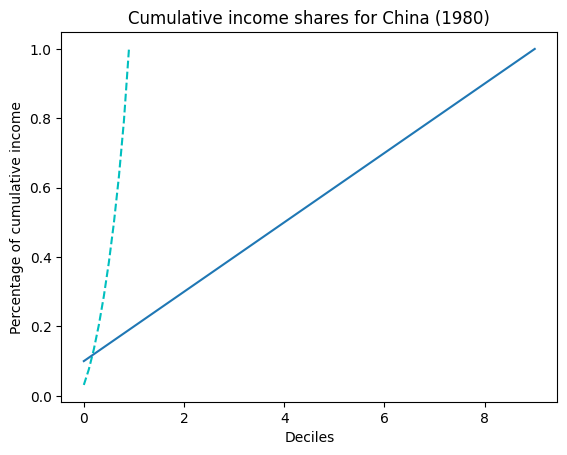

In [ ]:
# Solution goes here

plt.xlabel("Deciles")
plt.ylabel("Percentage of cumulative income")


plt.title("Cumulative income shares for China (1980)")
x =  np.arange(0, 1, 0.1)
plt.plot(x, cum_inc_share_c80, color = "c", linestyle = "dashed", label = "China, 1980")
plt.plot([0, 9], [0.1, 1])

This is the Lorenz curve. You can also add the perfect equality line by adding the following code to the code block above: `plt.plot([0, 9], [0.1, 1])`

**Exercise:** Add the other Lorenz curves to the chart. Use the dashed style for the data from 1980, add an appropriate label, and choose a different color for each curve. You can read more about the different colors available in the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
# Solution goes here


As the chart shows, the income distribution has changed more clearly for China than for the US.

Finally, it is good practice to add a legend to your graph. We use the `legend` function from the `pyplot` package to do so. You can also specify the desired location of your legend. In this case, we choose `loc = "upper left"`. You can read more about the different locations available in the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

**Exercise:** Add the legend to the previous codeblock above.

## Calculating Gini coefficients

A rough way to compare income distributions is to use a summary measure such as the Gini coefficient. The Gini coefficient ranges from 0 (complete equality) to 1 (complete inequality). It is calculated by dividing the area between the Lorenz curve and the perfect equality line, by the total area underneath the perfect equality line. 

For the perfect equality line, if income was shared equally across the population, the bottom 10% of people would have 10% of the total income, the bottom 20% would have 20% of the total income, and so on. Intuitively, the further away the Lorenz curve is from the perfect equality line, the more unequal the income distribution is, and the higher the Gini coefficient will be.

We will now calculate the Gini coefficient for each of the Lorenz curves. In the end, you should have four coefficients in total.

You could calculate the Gini coefficient manually (by decomposing the area under the Lorenz curve into rectangles and triangles), but as with so many problems, someone else has already figured out how to do that and has provided Python users with a package (called `inequalipy`, although we will abbreviate it as `ineq`) that does this task for you. The function that calculates Gini coefficients is called `gini`, and we apply it to the income deciles from before (`decs_c80`, `decs_c14`, `decs_us80`, and `decs_us14`).

In [ ]:
!pip install inequalipy
import inequalipy as ineq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The first command in the codeblock above is needed to install `inequalipy` as Google Colab does not include it (unlike, for instance, `matplotlib` or `pandas`) by default.

We can now calculate the Gini coefficent as follows:

In [ ]:
ineq.gini(decs_c80)

0.2908585055643879

**Exercise:** Calculate the Gini coefficients for the remaining income deciles (`decs_c14`, `decs_us80`, and `decs_us14`). Check that the coefficients are consistent with what you see in your charts.

In [ ]:
# Solution goes here
ineq.gini(decs_c14)

0.5107187816001816

In [ ]:
ineq.gini(decs_us80)


0.34479944927008044

In [ ]:
ineq.gini(decs_us14)

0.3999496834039925

As we can see, the Gini coefficients for both countries have increased, confirming what we already saw from the Lorenz curves that in both countries the income distribution has become more unequal.